# 자이로 센서 읽기 및 다루기

In [50]:
import pandas as pd

# 데이터 불러오기
# X축은 좌우 / Y축은 앞뒤 / Z축은 동체 자체의 회전
df = pd.read_csv("./data/gyro/학원주변걷기_gyr.csv")


# df 전처리 time컬럼 및 첫번째 행 삭제
# df.drop(['time'], axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)

display(df)

# str을 뉴머릭으로!
df['X_value'] = pd.to_numeric(df['X_value'])
df['Y_value'] = pd.to_numeric(df['Y_value'])
df['Z_value'] = pd.to_numeric(df['Z_value'])


# 각 컬럼의 평균을 알아봅시다.
print("X축 평균 : ", df['X_value'].mean())
print("X축 표준편차 : ", df['X_value'].std())
print("Y축 평균 : ", df['Y_value'].mean())
print("Y축 표준편차 : ", df['Y_value'].std())
print("Z축 평균 : ", df['Z_value'].mean())
print("Z축 표준편차 : ", df['Z_value'].std())



# 전부 정규화시켜봅시다.
# 정규화 함수
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['X_value', 'Y_value', 'Z_value']
data = standard_scaling(df, scale_columns)

display(data)

,time,X_value,Y_value,Z_value
1,0.0000,0.00000,0.00000,0.00000
2,0.0016,25.31551,-55.12128,30.60200
3,0.0487,0.39796,-0.25550,-3.05252
4,0.1014,1.52534,0.15674,-5.70789
5,0.1526,2.85511,1.27998,-7.21030
...,...,...,...,...
11181,581.1326,158.28754,78.63102,36.37458
11182,581.1848,156.06323,78.60236,33.65569
11183,581.2410,153.65468,78.72060,31.40559
11184,581.2889,151.87289,79.23051,30.60081


X축 평균 :  -14.06441677067501
X축 표준편차 :  33.97611978794694
Y축 평균 :  17.314758936075098
Y축 표준편차 :  22.79429532634784
Z축 평균 :  -109.86382844702727
Z축 표준편차 :  85.63936548508705


,time,X_value,Y_value,Z_value
1,0.0000,0.413950,-0.759609,1.282866
2,0.0016,1.159047,-3.177814,1.640202
3,0.0487,0.425663,-0.770818,1.247222
4,0.1014,0.458845,-0.752733,1.216216
5,0.1526,0.497983,-0.703456,1.198672
...,...,...,...,...
11181,581.1326,5.072738,2.689983,1.707607
11182,581.1848,5.007271,2.688725,1.675859
11183,581.2410,4.936382,2.693913,1.649585
11184,581.2889,4.883939,2.716283,1.640188


In [49]:
# 변화량을 만들어보자 -> X Y Z

variance_list = []

for i in range (len(data)):
    try :
        variance = data.iloc[i+1,1] - data.iloc[i,1]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
data['X변화량'] = variance_list


variance_list2 = []
for i in range (len(data)):
    try :
        variance2 = data.iloc[i+1,2] - data.iloc[i,2]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
data['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(data)):
    try :
        variance2 = data.iloc[i+1,3] - data.iloc[i,3]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
data['Z변화량'] = variance_list3

display(data)

ValueError: Length of values (0) does not match length of index (11185)

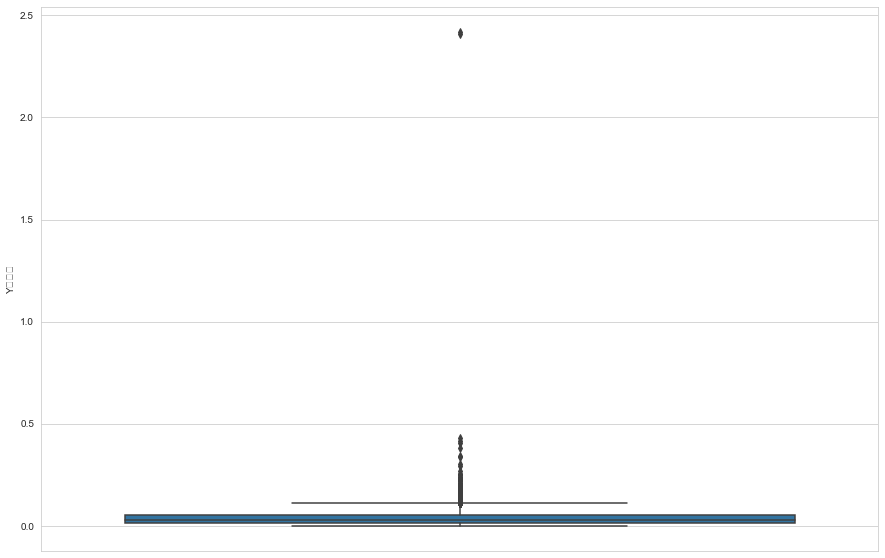

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))

sns.boxplot(y='Y변화량', data=data)
plt.show()

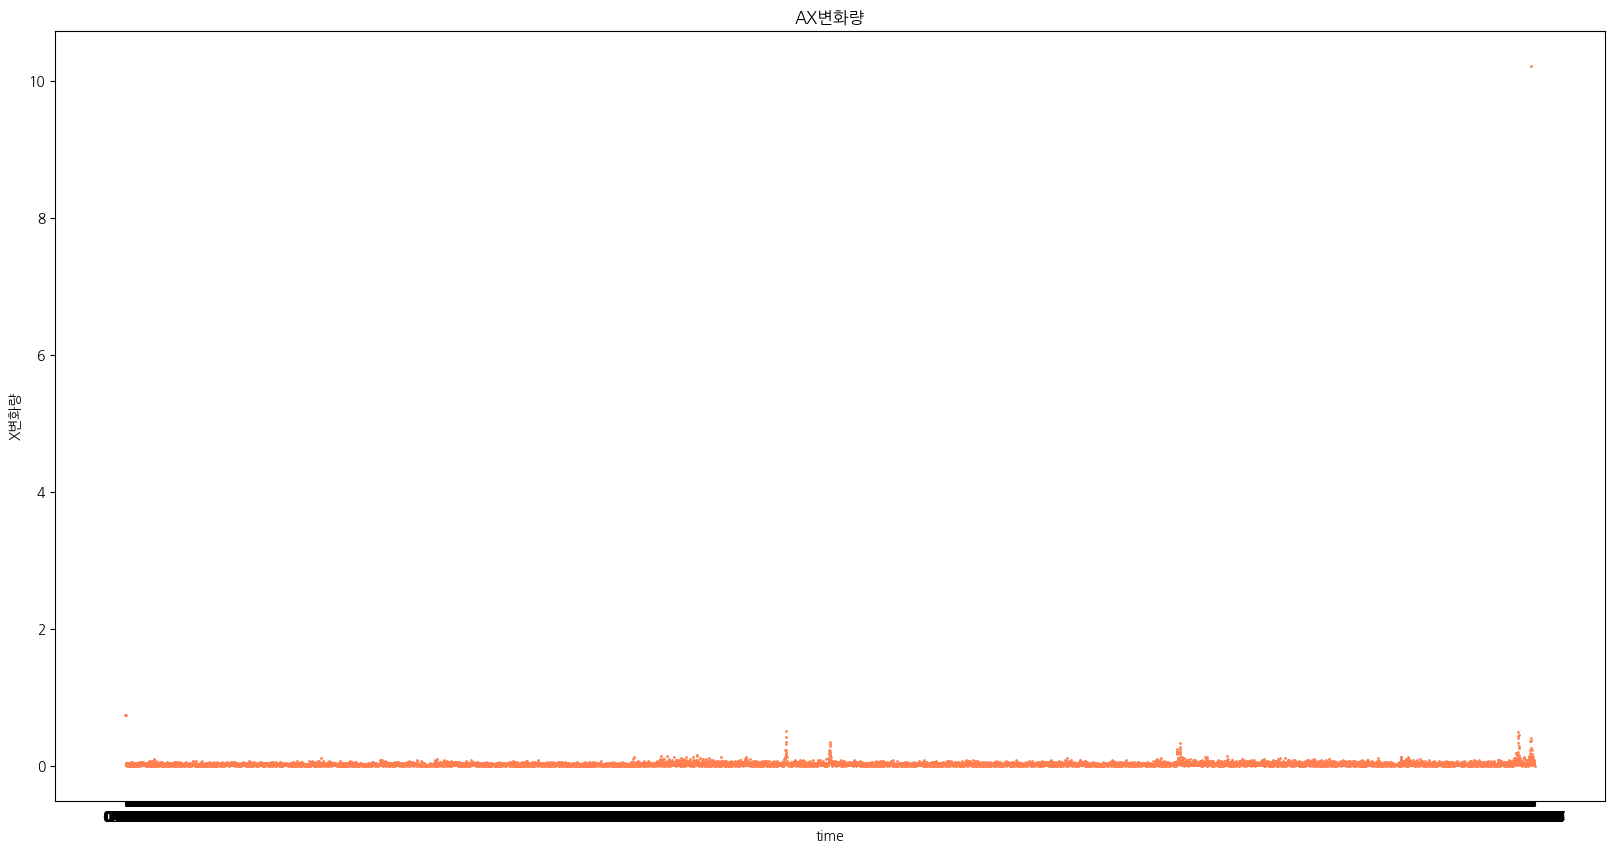

In [34]:
# 군집분석을 어떻게 할 것인가? -> 산점도부터 그려보자!!

# 먼저 AX변화량과 AY변화량을 찾아내 X값과 Y값으로 준다음 산점도를 그려보자
plt.style.use('default')

data.plot(kind='scatter', x='time', y='X변화량', c='coral', s=1, figsize=(20,10))
plt.title('AX변화량')
plt.show()


In [47]:
# 이상치 잡아내기 ==> 몇으로 설정할 것인가는 문제 0.3(18) or 0.4(10)


# X축 변화량 이상치 잡아내기
x = 0
y = 0
z = 0
for i in range (len(data)):
    if data.iloc[i,4] > 0.3:
        x += 1
    if data.iloc[i,5] > 0.3:
        y += 1

    
print("X축변화량 이상치 : ",x)
print("Y축변화량 이상치 : ",y)


X축변화량 이상치 :  18
Y축변화량 이상치 :  9


In [54]:
# 어떻게 실시간을 잡으려고요?!
# 슈방 한 번 해봅시다.

# 일단 정규화용 평균찾기
X_mean = -14.06441677067501
X_std = 33.97611978794694
Y_mean = 17.314758936075098
Y_std = 22.79429532634784
Z_mean = -109.86382844702727
Z_std = 85.63936548508705


# 데이터 입력이 어떻게 되는건가요!
def X_detect_outlier(sample1, sample2): 
    
    # sample1은 직전값  / sample2는 현재값
    pre_time = (sample1 - X_mean) / X_std
    real_time = (sample2 - X_mean) / X_std
    
    detect = abs(real_time - pre_time)
    
    if detect > 0.3 :
        print("alert")
    else :
        print("안전운전하세요.")
        
def Y_detect_outlier(sample1, sample2): 
    
    # sample1은 직전값  / sample2는 현재값
    pre_time = (sample1 - Y_mean) / Y_std
    real_time = (sample2 - Y_mean) / Y_std
    
    detect = abs(real_time - pre_time)
    
    if detect > 0.3 :
        print("alert")
    else :
        print("안전운전하세요.")


안전운전하세요.
alert


In [ ]:
### 군집분석을 해보자 ### 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster

# # 모형 준비
x = data.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x[:5])

# # 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=3, n_init=10)

# # 모형 학습
kmeans.fit(x)

# # 예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)

# # 예측결과를 데이터베이스에 입력
data['군집'] = cluster_label
# display(df.head(5))

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='AX변화량', y='AY변화량', c='군집', cmap='Set1', colorbar=False, figsize=(10,5), legend=True)
